# Basics of K-Means 

## Clustering
Clustering is the task of grouping a set of objects in such a way that objects in the same group (known as a cluster) are more similar to each other than to those in the other groups (clusters). In short, Intra-class similarity is high and Inter-class similarity is low.

K-Means clustering is one of the most popular and simplest unsupervised machine learning algorithms. Typically in unsupervised learning, algorithms make inferences from datasets using only input vectors without refering to labelled, or known, outcomes. 

In this short session, we will 
1. load the dataset and  quickly understand the data set
2. visualize the data set 
3. apply KMeans on the data set ( using KMeans() of scikit learn ).
4. plot the clusters with centroids 
5. apply MiniBatch KMeans on the data set 
6. plot the clusters with centroids

The dataset we use for this section is adapted from the "xclara" dataset, containing just 2 columns, available from Kaggle (at https://www.kaggle.com/hdriss/xclara) 

# 1. Necessary Imports and Understanding the dataset

In [1]:
import numpy as np  
import pandas as pd 
from matplotlib import pyplot as plt 

In [2]:
xclaraDF = pd.read_csv('xclara.csv') 

In [3]:
print (xclaraDF.shape) 

(3000, 2)


In [4]:
print (xclaraDF.columns)

Index(['V1', 'V2'], dtype='object')


In [5]:
print (xclaraDF.head(2)) 

          V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810


In [6]:
print (xclaraDF.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      3000 non-null   float64
 1   V2      3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB
None


In [7]:
print (xclaraDF.describe())

                V1           V2
count  3000.000000  3000.000000
mean     40.611358    22.862141
std      25.859054    31.759714
min     -22.495990   -38.795500
25%      18.462790    -4.003494
50%      41.552210    13.827390
75%      62.249480    55.729100
max     104.376600    87.313700


# 2. Visualizing the Data Set

Here, we will learn to visualize the Dataset.

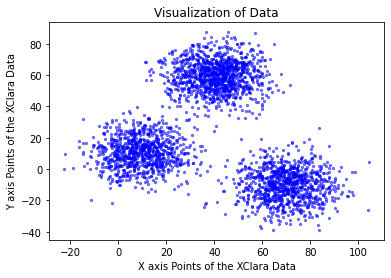

In [10]:
# Getting the values and plotting it
f1 = xclaraDF['V1'].values
f2 = xclaraDF['V2'].values
plt.scatter(f1, f2, c='blue', s = 5,alpha=0.5)
plt.xlabel('X axis Points of the XClara Data')
plt.ylabel('Y axis Points of the XClara Data')
plt.title('Visualization of Data');

# 3. Standardize the Dataset and Keep in X

In [12]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(xclaraDF)

array([[-1.49059736, -0.82205354],
       [-0.87700146, -0.22287703],
       [-1.52884059, -0.48947405],
       ...,
       [ 0.92261449, -1.05067264],
       [ 1.93819213, -1.10592416],
       [ 0.93864404, -1.50339543]])

# 4. K-Means in Action!

We are given a data set of items, with certain features, and values for these features (like a vector), The task is to categorize those items into groups. To achieve this, we will use the kMeans algorithm; an unsupervised learning algorithm.

The way kmeans algorithm works is as follows:

1. At first, specify number of clusters K.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
4. Compute the sum of the squared distance between data points and all centroids (pairwise Euclidean distances).
5. Assign each data point to the closest cluster (centroid).
6. Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

In provided data, since we could have a look at the plot and say there are 3 prominent clusters. This is not the proper way to go about finding optimal clusters. 

<font color=red>We will study about Elbow method to select optimal k value in the Module 2.</font>
<font color=blue>In short, An elbow plot shows at what value of k, the distance between the mean of a cluster and the other data points in the cluster is at its lowest.</font>

![kmeans](K-means_convergence.gif)

In [15]:
from sklearn.cluster import KMeans
import time 
kmeans = KMeans(n_clusters=3)
t0 = time.time()
kmeans = kmeans.fit(xclaraDF)
t_kmeans = time.time() - t0
print(t_kmeans)

0.07507896423339844


In [18]:
labels = kmeans.predict(xclaraDF)
centroids = kmeans.cluster_centers_
print("The centroids of Each Cluster are : ")
print(centroids)

The centroids of Each Cluster are : 
[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


#### We are plotting the first column of the X array against the second column, however in this case we are also passing kmeans.labels_ as value for the c parameter that corresponds to labels. The cmap='rainbow' parameter is passed for choosing the color type for the different data points. The output graph should look like this:

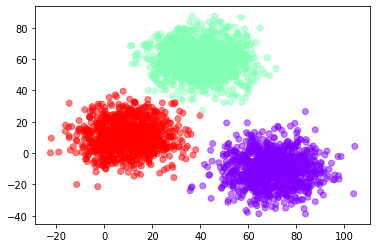

In [23]:
plt.scatter(xclaraDF['V1'],xclaraDF['V2'], c=kmeans.labels_, cmap='rainbow',alpha=0.5)

##### Now let's plot the points along with the centroid coordinates of each cluster to see how the centroid positions effects clustering. Again we will use two clusters to see the effect of centroids. Execute the following script to draw the graph:

Train Time:
0.07507896423339844


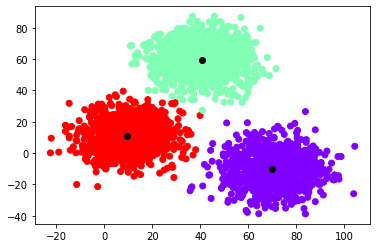

In [26]:
plt.scatter(xclaraDF['V1'],xclaraDF['V2'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
print("Train Time:")
print(t_kmeans)

# 5. MiniBatch K-Means in Action! 

K-means is one of the most popular clustering algorithms, mainly because of its good time performance. With the increasing size of the datasets being analyzed, the computation time of K-means increases because of its constraint of needing the whole dataset in main memory. For this reason, several methods have been proposed to reduce the temporal and spatial cost of the algorithm. A different approach is the <font color=blue>Mini batch K-means algorithm.</font>

Mini Batch K-means algorithm‘s main idea is to use small random batches of data of a fixed size, so they can be stored in memory. Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until convergence.

In [27]:

from sklearn.cluster import MiniBatchKMeans
import time
# We are now creating a minibatch Kmeans and object and using fit function for same
mbk = MiniBatchKMeans(n_clusters=3, batch_size=1000)
#Note the current time 
t0 = time.time()
mbk.fit(xclaraDF)
#Time Take for fitting is Current time - time before starting to fit which is in t0
t_mini_batch = time.time() - t0
print(t_mini_batch)

0.06930255889892578


In [28]:
# Getting the cluster labels
labels = mbk.predict(xclaraDF)
# Centroid values and print them
centroids = mbk.cluster_centers_
print("The centroids of Each Cluster when using MiniBatch KMeans are : ")
print(centroids)

The centroids of Each Cluster when using MiniBatch KMeans are : 
[[  9.386008    10.5636258 ]
 [ 69.99509719 -10.20204001]
 [ 40.64144031  59.59315725]]


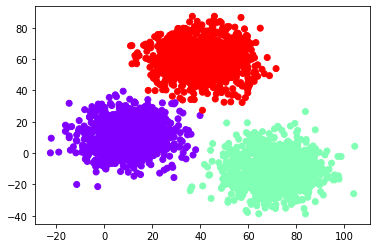

In [29]:
# Plot the Clustered data
plt.scatter(xclaraDF['V1'],xclaraDF['V2'], c=mbk.labels_, cmap='rainbow')

Train Time:
0.06930255889892578


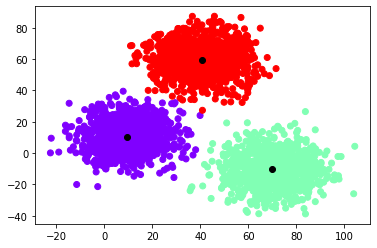

In [30]:
# Plot the clusters with the centroids and the time take to fit! 
plt.scatter(xclaraDF['V1'],xclaraDF['V2'], c=mbk.labels_, cmap='rainbow')
plt.scatter(mbk.cluster_centers_[:,0] ,mbk.cluster_centers_[:,1], color='black')
print("Train Time:")
print(t_mini_batch)

<h2><font color=blue>Now that you have learnt about these 2 KMeans Techniques, After Module 2 is completed, Please try to implement the above KMeans technique without using kmeans library on the same dataset. Match your solution with the below one :) </font></h2>

<h2><font color=blue>This notebook and the dataset will be shared. Please try to change the values of k , colors, batch and other parameters and feel the difference.</font></h2>

<h1><font color=green><center>Happy Clustering!</center></font></h1>


<h3><center>Solutions for Manually Implementing KMeans ( For Self Learning later )</center></h3>

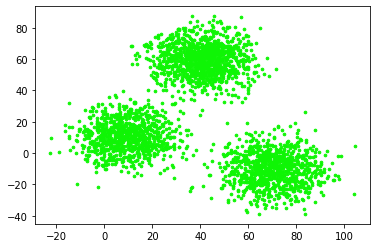

In [32]:
# Plotting along with the Centroids
plt.scatter(xclaraDF['V1'], xclaraDF['V2'], c='#0FF505', s=7)

In [78]:
from sklearn.metrics import pairwise_distances
class Kmeans:
    
    def __init__(self, k, max_iter = 200):
        self.k = k
        self.max_iter = max_iter       
    
    def initialise_centroids(self, data):
        self.centroids=data.sample(self.k)
        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.""" 
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points""" 
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids

    
    def predict(self, data):
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self    

In [79]:
kmeans_obj=Kmeans(3,600)
kmeans_obj.fit_kmeans(xclaraDF)

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


In [80]:
print(kmeans_obj.centroids)

[[ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]]


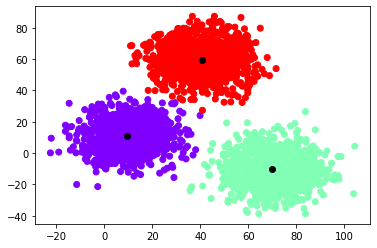

In [81]:
plt.scatter(xclaraDF['V1'],xclaraDF['V2'], c=mbk.labels_, cmap='rainbow')
plt.scatter(kmeans_obj.centroids[:,0] ,kmeans_obj.centroids[:,1], color='black')